# Analisis Explotario y Ingenieria de Caracteristicas
### Nombre: Eduardo Arce, Esteban Cordova

### Importaci√≥n de modulos

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import PCA
import joblib


# Configuraci√≥n est√©tica
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
print("Modulos importados")

Modulos importados


 ## 1. Carga inicial del dataset
### Vistazo inicial al mismo

In [39]:
# Cargar el dataset
df = pd.read_csv("test_set_1.csv")

# Vista inicial
df.head()

userId  movieId  rating   timestamp
0   66954      780     3.0   850944100
1    9877      566     3.0   945497442
2   38348     1086     4.0   999975049
3  177202     1020     4.0   948169041
4  140400   275079     3.5  1653782463

## 2. Informaci√≥n general del DataFrame

Obtenemos una descripci√≥n b√°sica de la estructura del dataset, incluyendo:

- El n√∫mero total de registros (filas)
- Las columnas presentes en el dataset
- El tipo de dato de cada columna (`int64`, `float64`, `object`, etc.)
- La cantidad de valores no nulos por columna

Esta informaci√≥n es √∫til para detectar la presencia de valores faltantes, identificar columnas mal tipadas (por ejemplo fechas como `object`), y verificar que la estructura general sea coherente antes de proceder con el an√°lisis.


In [40]:
# Informaci√≥n general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5333368 entries, 0 to 5333367
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 162.8 MB


## 3. Estad√≠sticas descriptivas

Obtenemos estad√≠sticas resumidas de las columnas num√©ricas, como la media, mediana, m√≠nimo, m√°ximo y desviaci√≥n est√°ndar. Esto ayuda a entender la dispersi√≥n, sesgo y rangos t√≠picos de los datos num√©ricos, especialmente del `rating`.


In [41]:
# Estad√≠sticas descriptivas
df.describe()

userId       movieId        rating     timestamp
count  5.333368e+06  5.333368e+06  5.333368e+06  5.333368e+06
mean   1.003232e+05  2.932297e+04  3.540315e+00  1.275147e+09
std    5.795290e+04  5.096274e+04  1.059116e+00  2.561771e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  8.228736e+08
25%    5.014500e+04  1.232000e+03  3.000000e+00  1.050908e+09
50%    1.003430e+05  3.461000e+03  3.500000e+00  1.272265e+09
75%    1.505050e+05  4.419900e+04  4.000000e+00  1.503066e+09
max    2.009480e+05  2.927550e+05  5.000000e+00  1.697164e+09

## 4. M√©tricas generales del dataset

Calculamos algunas m√©tricas clave para tener una visi√≥n general del conjunto:

- Total de usuarios y pel√≠culas √∫nicos, lo que da una idea del tama√±o del sistema.
- Estad√≠sticas b√°sicas de los ratings (m√≠nimo, m√°ximo y promedio).
- Rango temporal de las calificaciones, √∫til para detectar si hay sesgos de √©poca o cambios en el comportamiento del usuario a lo largo del tiempo.


In [42]:
# Estadisticas varias
# N√∫mero de usuarios y pel√≠culas √∫nicos
num_users = df['userId'].nunique()
num_movies = df['movieId'].nunique()

# Estad√≠sticas de ratings
rating_min = df['rating'].min()
rating_max = df['rating'].max()
rating_mean = df['rating'].mean()

# Rango de tiempo (de timestamp a fecha)
df['date'] = pd.to_datetime(df['timestamp'], unit='s')
date_min = df['date'].min()
date_max = df['date'].max()

# Mostrar resultados
print(f'Usuarios √∫nicos: {num_users:,}')
print(f'Pel√≠culas √∫nicas: {num_movies:,}')
print(f'Rating m√≠nimo: {rating_min}')
print(f'Rating m√°ximo: {rating_max}')
print(f'Rating promedio: {rating_mean:.2f}')
print(f'Rango temporal: {date_min.date()} ‚Üí {date_max.date()}')

Usuarios √∫nicos: 200,384
Pel√≠culas √∫nicas: 50,879
Rating m√≠nimo: 0.5
Rating m√°ximo: 5.0
Rating promedio: 3.54
Rango temporal: 1996-01-29 ‚Üí 2023-10-13


# Visualizaci√≥n

## 5. Distribuci√≥n de calificaciones

Visualizamos la distribuci√≥n de las calificaciones para identificar posibles sesgos. Es com√∫n en datasets como MovieLens observar una concentraci√≥n en valores altos (por ejemplo, 4.0 o 5.0), lo cual puede influir en los modelos de recomendaci√≥n.

El uso de KDE (`kde=True`) permite suavizar la curva y observar mejor la forma general de la distribuci√≥n.


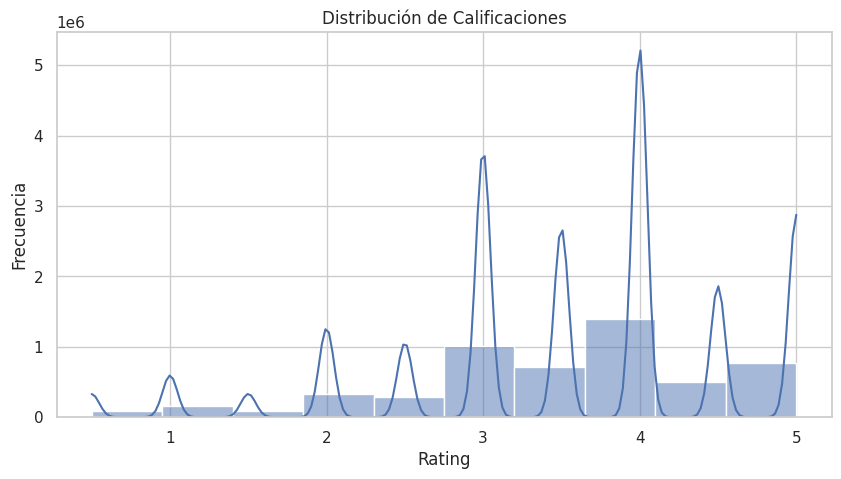

In [43]:
# Distribuci√≥n de calificaciones
sns.histplot(df['rating'], bins=10, kde=True)
plt.title("Distribuci√≥n de Calificaciones")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

## 6. Actividad de los usuarios

Se analiza cu√°ntas calificaciones ha hecho cada usuario. El boxplot permite identificar la dispersi√≥n de esta actividad y detectar usuarios muy activos (outliers) que califican muchas m√°s pel√≠culas que el promedio.

Esto es √∫til para entender la densidad del dataset y evaluar si existen usuarios que podr√≠an influir desproporcionadamente en los modelos.


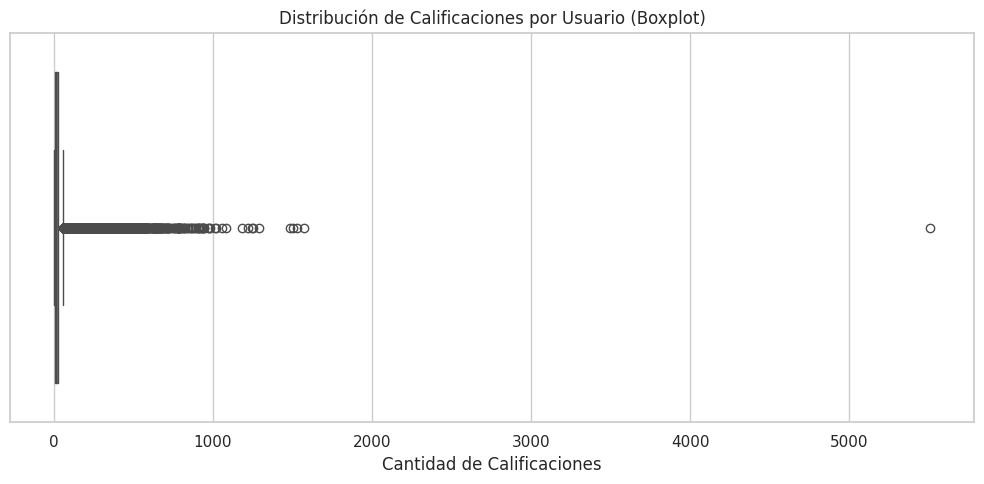

In [44]:
user_counts = df['userId'].value_counts()
sns.boxplot(x=user_counts)
plt.title("Distribuci√≥n de Calificaciones por Usuario (Boxplot)")
plt.xlabel("Cantidad de Calificaciones")
plt.tight_layout()
plt.show()


### Observaciones del gr√°fico

El boxplot revela una fuerte asimetr√≠a en la cantidad de calificaciones por usuario. La gran mayor√≠a califica menos de 200 pel√≠culas, mientras que unos pocos usuarios extremos llegan a superar las 5000. Este patr√≥n de largo extremo es caracter√≠stico de datasets de comportamiento humano en sistemas de recomendaci√≥n, y es importante considerarlo al entrenar modelos, ya que estos usuarios outlier pueden influir de forma desproporcionada.


## 7. Distribuci√≥n de usuarios con baja actividad

Se analiza en detalle el subconjunto de usuarios que realizaron 200 o menos calificaciones. Esta visualizaci√≥n permite observar con mayor claridad la distribuci√≥n en la "cola corta" del boxplot anterior, donde se concentra la mayor√≠a de usuarios.

Este tipo de an√°lisis ayuda a identificar patrones en usuarios poco activos, quienes suelen representar el mayor volumen en sistemas reales y pueden afectar la calidad de las recomendaciones personalizadas.


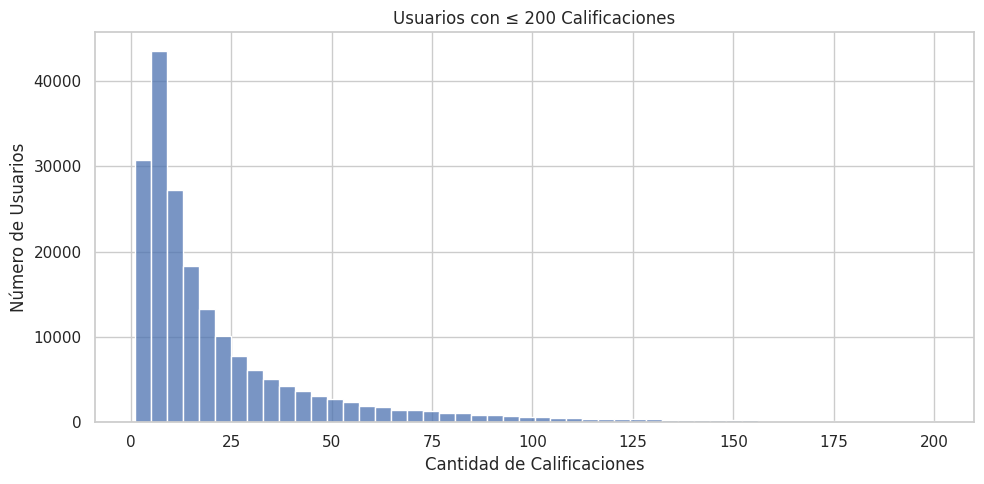

In [45]:
user_counts_trimmed = user_counts[user_counts <= 200]
sns.histplot(user_counts_trimmed, bins=50, kde=False)
plt.title("Usuarios con ‚â§ 200 Calificaciones")
plt.xlabel("Cantidad de Calificaciones")
plt.ylabel("N√∫mero de Usuarios")
plt.tight_layout()
plt.show()


## 8. Actividad por pel√≠cula

El boxplot muestra la cantidad de calificaciones recibidas por cada pel√≠cula. Al igual que en el caso de los usuarios, observamos una distribuci√≥n asim√©trica, donde pocas pel√≠culas concentran una gran cantidad de ratings, mientras que la mayor√≠a reciben solo unos pocos.

Esto refleja un fen√≥meno t√≠pico en sistemas de recomendaci√≥n: una minor√≠a de √≠tems son muy populares, mientras que muchos otros tienen baja exposici√≥n (problema de "larga cola").


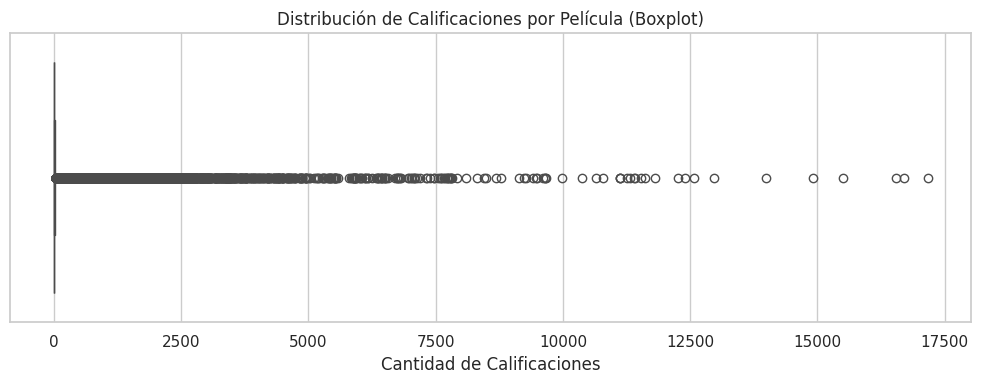

In [46]:
movie_counts = df['movieId'].value_counts()
plt.figure(figsize=(10, 4))
sns.boxplot(x=movie_counts)
plt.title("Distribuci√≥n de Calificaciones por Pel√≠cula (Boxplot)")
plt.xlabel("Cantidad de Calificaciones")
plt.tight_layout()
plt.show()

## 9. Pel√≠culas con baja cantidad de calificaciones

Se analiza el subconjunto de pel√≠culas que han recibido 100 o menos calificaciones. Este tipo de visualizaci√≥n permite enfocarse en la mayor√≠a silenciosa del cat√°logo: pel√≠culas que apenas han sido vistas o valoradas.

Es importante tener en cuenta esta baja interacci√≥n al momento de entrenar modelos, ya que estas pel√≠culas suelen tener datos insuficientes para generar buenas recomendaciones (problema de *cold start*).


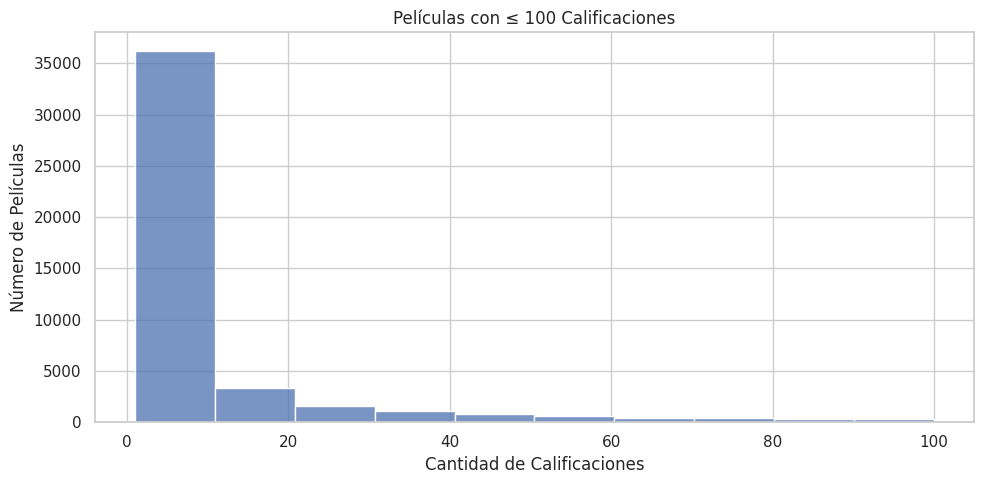

In [47]:
movie_counts_trimmed = movie_counts[movie_counts <= 100]

plt.figure(figsize=(10, 5))
sns.histplot(movie_counts_trimmed, bins=10, kde=False)
plt.title("Pel√≠culas con ‚â§ 100 Calificaciones")
plt.xlabel("Cantidad de Calificaciones")
plt.ylabel("N√∫mero de Pel√≠culas")
plt.tight_layout()
plt.show()

## 10. Evoluci√≥n temporal de las calificaciones

Se transforma el timestamp a formato de fecha para analizar c√≥mo ha evolucionado la cantidad de calificaciones a lo largo del tiempo. 

La distribuci√≥n por a√±o permite identificar posibles aumentos en la actividad de los usuarios, cambios en el uso de la plataforma o periodos an√≥malos que podr√≠an requerir un tratamiento especial.


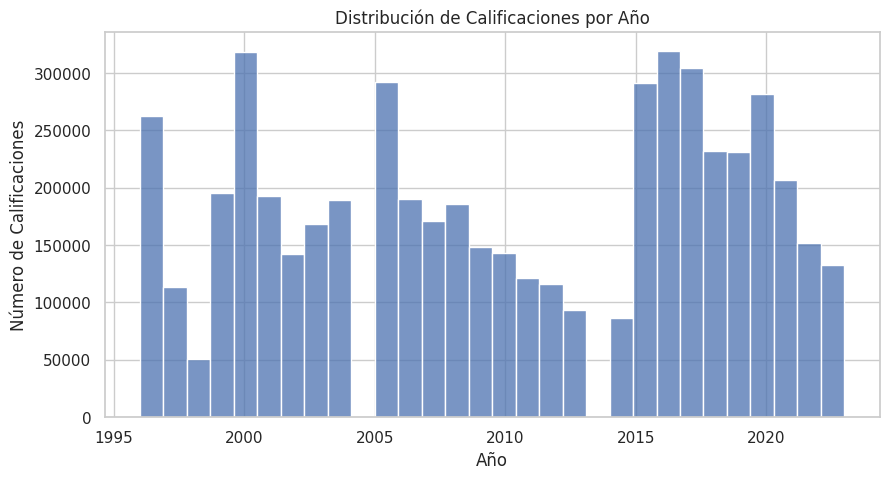

In [48]:
# Conversi√≥n de timestamp a fecha
df['date'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['date'].dt.year

# Evoluci√≥n de calificaciones por a√±o
sns.histplot(df['year'], bins=30, kde=False)
plt.title("Distribuci√≥n de Calificaciones por A√±o")
plt.xlabel("A√±o")
plt.ylabel("N√∫mero de Calificaciones")
plt.show()

### 11. Usuarios con comportamiento extremo constante

Se identifican usuarios que califican exclusivamente con 5.0 o con 0.5. Este tipo de comportamiento sugiere perfiles con sesgo extremo, posiblemente poco √∫tiles para modelos predictivos ya que no ofrecen variabilidad en sus preferencias.


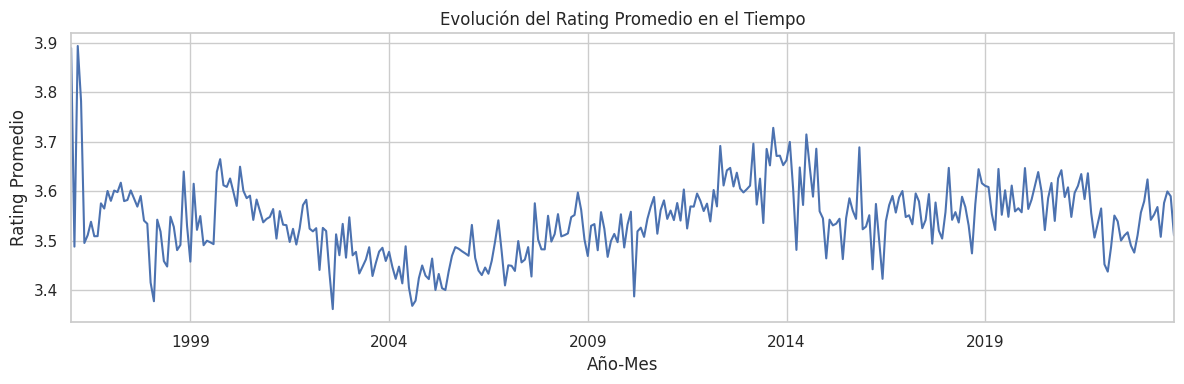

In [49]:
df['year_month'] = df['date'].dt.to_period('M')
monthly_avg = df.groupby('year_month')['rating'].mean()

monthly_avg.plot(figsize=(12, 4))
plt.title("Evoluci√≥n del Rating Promedio en el Tiempo")
plt.xlabel("A√±o-Mes")
plt.ylabel("Rating Promedio")
plt.grid(True)
plt.tight_layout()
plt.show()


### 12. Usuarios extremadamente activos (Z-score)

Aplicando Z-score al n√∫mero de calificaciones por usuario, se detectan aquellos usuarios cuyo comportamiento es estad√≠sticamente extremo. Este an√°lisis cuantitativo complementa los boxplots anteriores, identificando outliers en t√©rminos de volumen de interacci√≥n.


In [50]:
from scipy.stats import zscore

user_rating_counts = df['userId'].value_counts()
z_scores = zscore(user_rating_counts)

outlier_users_z = user_rating_counts[z_scores > 3]  # Z > 3 como umbral com√∫n

print(f"Usuarios extremadamente activos (Z-score > 3): {len(outlier_users_z)}")


Usuarios extremadamente activos (Z-score > 3): 3541


## 13. Dispersi√≥n de interacciones (Sparsity)

Se visualiza la matriz de interacciones entre usuarios y pel√≠culas para evidenciar el grado de dispersi√≥n de los datos.

Como es com√∫n en sistemas de recomendaci√≥n, la matriz es extremadamente dispersa: la mayor√≠a de los usuarios han calificado solo una peque√±a fracci√≥n del cat√°logo. Esto refuerza la necesidad de usar t√©cnicas robustas ante datos escasos (como filtrado colaborativo, modelos basados en embeddings, etc.).


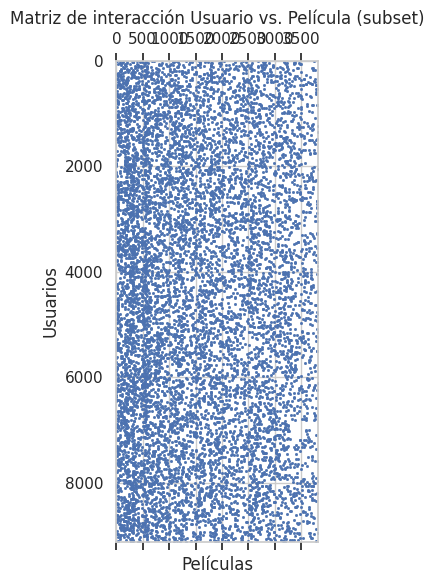

In [51]:
sample = df.sample(10000)  # Subset para eficiencia
pivot = sample.pivot(index='userId', columns='movieId', values='rating').fillna(0)

plt.figure(figsize=(10, 6))
plt.spy(pivot, markersize=1)
plt.title("Matriz de interacci√≥n Usuario vs. Pel√≠cula (subset)")
plt.xlabel("Pel√≠culas")
plt.ylabel("Usuarios")
plt.tight_layout()
plt.show()


# Analisis estadistico

## 14. An√°lisis estad√≠stico general

Se resumen las estad√≠sticas descriptivas de las calificaciones (`rating`), como el promedio, los valores m√≠nimo y m√°ximo, as√≠ como la desviaci√≥n est√°ndar, que indica el grado de variabilidad en las opiniones de los usuarios.

Tambi√©n se identifican:
- El n√∫mero total de usuarios y pel√≠culas √∫nicos.
- La pel√≠cula con m√°s y menos calificaciones (√≠tems extremos en popularidad).
- El usuario m√°s activo (con mayor n√∫mero de ratings) y el menos activo.

Estos datos permiten tener una visi√≥n global del comportamiento de interacci√≥n dentro del dataset.


In [52]:
# Estad√≠sticas generales del rating
rating_stats = df['rating'].describe()
print("Estad√≠sticas de Ratings:")
print(rating_stats)

# Desviaci√≥n est√°ndar
std_rating = df['rating'].std()
print("\nDesviaci√≥n est√°ndar del rating:", round(std_rating, 4))

# N√∫mero total de usuarios √∫nicos
num_users = df['userId'].nunique()
print("\nTotal de usuarios √∫nicos:", num_users)

# N√∫mero total de √≠tems √∫nicos
num_items = df['movieId'].nunique()
print("Total de pel√≠culas √∫nicas:", num_items)

# √çtem m√°s consumido
top_item = df['movieId'].value_counts().idxmax()
top_item_count = df['movieId'].value_counts().max()
print("\nPel√≠cula m√°s calificada:", top_item, "con", top_item_count, "calificaciones")

# √çtem menos consumido
bottom_item = df['movieId'].value_counts().idxmin()
bottom_item_count = df['movieId'].value_counts().min()
print("Pel√≠cula menos calificada:", bottom_item, "con", bottom_item_count, "calificaci√≥n")

# Usuario m√°s activo
top_user = df['userId'].value_counts().idxmax()
top_user_count = df['userId'].value_counts().max()
print("\nUsuario m√°s activo:", top_user, "con", top_user_count, "ratings")

# Usuario menos activo
bottom_user = df['userId'].value_counts().idxmin()
bottom_user_count = df['userId'].value_counts().min()
print("Usuario menos activo:", bottom_user, "con", bottom_user_count, "rating")


Estad√≠sticas de Ratings:
count    5.333368e+06
mean     3.540315e+00
std      1.059116e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Desviaci√≥n est√°ndar del rating: 1.0591

Total de usuarios √∫nicos: 200384
Total de pel√≠culas √∫nicas: 50879

Pel√≠cula m√°s calificada: 318 con 17162 calificaciones
Pel√≠cula menos calificada: 189869 con 1 calificaci√≥n

Usuario m√°s activo: 175325 con 5507 ratings
Usuario menos activo: 82023 con 1 rating


## 15. Correlaci√≥n entre variables num√©ricas

Aunque el dataset cuenta con pocas variables num√©ricas, se explora la relaci√≥n entre `rating` y `timestamp` (momento de la calificaci√≥n).

Este an√°lisis permite detectar si existe alguna relaci√≥n temporal en la forma de calificar, como una tendencia a puntuar m√°s bajo o m√°s alto en ciertas √©pocas. La ausencia de correlaci√≥n tambi√©n puede ser un hallazgo relevante.


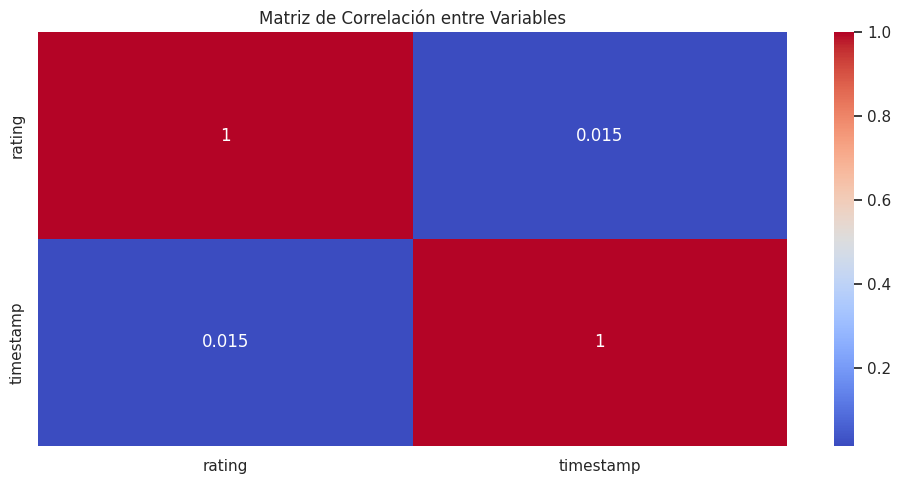

In [53]:
corr_matrix = df[['rating', 'timestamp']].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlaci√≥n entre Variables")
plt.tight_layout()
plt.show()


# Analisis de outliers

## 16. Detecci√≥n de outliers en comportamiento de usuarios

Se identifican usuarios que han otorgado siempre la misma calificaci√≥n. Este tipo de comportamiento puede indicar perfiles con sesgo extremo o datos no fiables (por ejemplo, bots, usuarios poco activos o con uso at√≠pico del sistema).

Adem√°s, se analiza qu√© valor espec√≠fico usaron estos usuarios √∫nicos: muchos de ellos tienden a calificar exclusivamente con 5.0 (valor m√°ximo), lo cual podr√≠a sesgar el promedio general si no se controla adecuadamente.

Este an√°lisis permite anticipar la necesidad de filtrar, ponderar o tratar de forma especial estos casos en etapas posteriores del modelado.


In [54]:
# Usuarios que solo usan una calificaci√≥n
user_rating_unique_counts = df.groupby('userId')['rating'].nunique()

# Usuarios que solo votan con 1 calificaci√≥n √∫nica (posible outlier)
outlier_users = user_rating_unique_counts[user_rating_unique_counts == 1]
print(f"Usuarios que solo usan un mismo valor de rating: {len(outlier_users)}")

# ¬øQu√© calificaci√≥n espec√≠fica usaron?
outlier_details = df[df['userId'].isin(outlier_users.index)].groupby('userId')['rating'].first().value_counts()
print("Distribuci√≥n de rating √∫nico entre los outliers:")
print(outlier_details)

# Usuarios que solo dan calificaciones altas o bajas (por ejemplo, solo 5.0 o solo 0.5)
only_high = outlier_details.get(5.0, 0)
only_low = outlier_details.get(0.5, 0)


Usuarios que solo usan un mismo valor de rating: 7104
Distribuci√≥n de rating √∫nico entre los outliers:
rating
5.0    2809
4.0    1750
3.0    1316
4.5     388
3.5     295
2.0     174
1.0     113
2.5     105
0.5     105
1.5      49
Name: count, dtype: int64


### 17. Outliers en la distribuci√≥n general de ratings

Se visualiza el boxplot de todos los ratings. Aunque el rango est√° acotado entre 0.5 y 5.0, este gr√°fico permite observar la distribuci√≥n general, acumulaciones en los extremos y confirmar si existen valores at√≠picos concentrados (como una sobrerrepresentaci√≥n del 5.0).


In [55]:
# Usuarios que solo usan ratings m√°ximos
only_5_users = df.groupby('userId')['rating'].apply(lambda x: x.nunique() == 1 and x.iloc[0] == 5.0)
only_0_5_users = df.groupby('userId')['rating'].apply(lambda x: x.nunique() == 1 and x.iloc[0] == 0.5)

print(f"Usuarios que solo dan 5.0: {only_5_users.sum()}")
print(f"Usuarios que solo dan 0.5: {only_0_5_users.sum()}")


Usuarios que solo dan 5.0: 2809
Usuarios que solo dan 0.5: 105


# Clustering

## 18. Segmentaci√≥n de usuarios (K-means Clustering)

Se aplica un modelo de clustering no supervisado (K-means) para identificar grupos de usuarios seg√∫n su comportamiento general: promedio de calificaciones y cantidad total de interacciones.

Esto permite clasificar a los usuarios en segmentos como:
- Cr√≠ticos (bajo promedio de rating)
- Generosos (alto promedio)
- Moderados
- Activos vs. pasivos (seg√∫n n√∫mero de calificaciones)

Esta segmentaci√≥n puede ser √∫til para personalizar estrategias de recomendaci√≥n o analizar diferencias de comportamiento.


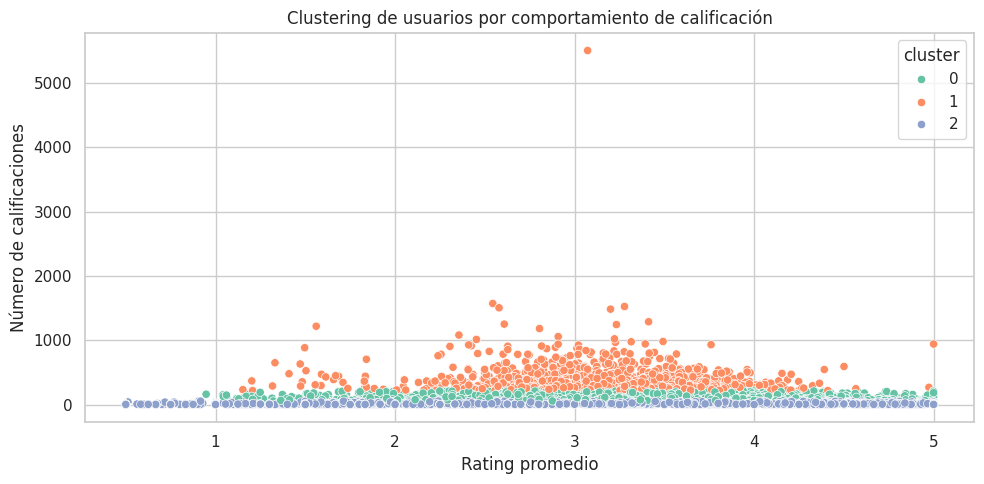

In [56]:
from sklearn.cluster import KMeans

user_profiles = df.groupby('userId')['rating'].agg(['mean', 'count']).reset_index()
user_profiles.columns = ['userId', 'avg_rating', 'num_ratings']

kmeans = KMeans(n_clusters=3, random_state=0)
user_profiles['cluster'] = kmeans.fit_predict(user_profiles[['avg_rating', 'num_ratings']])

sns.scatterplot(data=user_profiles, x='avg_rating', y='num_ratings', hue='cluster', palette='Set2')
plt.title("Clustering de usuarios por comportamiento de calificaci√≥n")
plt.xlabel("Rating promedio")
plt.ylabel("N√∫mero de calificaciones")
plt.grid(True)
plt.tight_layout()
plt.show()


## 19. Conclusiones del An√°lisis Exploratorio

- La mayor√≠a de los usuarios y pel√≠culas tienen una baja actividad, lo cual sugiere una distribuci√≥n de tipo "larga cola".
- Se identificaron usuarios at√≠picos que califican siempre con el mismo valor, especialmente con 5.0, lo que puede introducir sesgos.
- El an√°lisis temporal mostr√≥ una evoluci√≥n creciente en la actividad de calificaci√≥n, con variaciones en la media de los ratings a lo largo del tiempo.
- El dataset presenta alta dispersi√≥n en la matriz de interacci√≥n usuario-pel√≠cula, lo cual podr√≠a requerir t√©cnicas espec√≠ficas como filtrado colaborativo basado en vecinos o modelos con embeddings.
- Estas observaciones son fundamentales para dise√±ar modelos de recomendaci√≥n m√°s robustos, considerando tanto los comportamientos mayoritarios como los extremos.


# Experimentos

## Variables temporales derivadas del timestamp

A partir de la columna `timestamp`, se generaron nuevas variables temporales como:

- `year`: A√±o de la calificaci√≥n
- `month`: Mes del a√±o
- `weekday`: D√≠a de la semana (0 = lunes, 6 = domingo)

Estas variables permiten capturar patrones estacionales y comportamientos semanales. Por ejemplo, algunos usuarios podr√≠an calificar m√°s durante fines de semana o ciertos meses del a√±o, lo cual puede influir en su comportamiento y en la calidad de la predicci√≥n.


In [57]:
# üîπ 2. Convertir timestamp
df['date'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday

## Estaci√≥n del a√±o (`season`)

Se gener√≥ la variable `season` a partir del mes, codificando cada calificaci√≥n seg√∫n la estaci√≥n en la que fue realizada (`invierno`, `primavera`, `verano`, `oto√±o`).

Esta variable captura patrones de comportamiento estacional. Por ejemplo, es posible que en ciertas estaciones (como invierno o verano) los usuarios interact√∫en m√°s con la plataforma, lo cual puede influir en la cantidad y tipo de calificaciones registradas.


In [58]:
# üîπ 3. Codificar temporada, fin de semana y feriado
def get_season(month):
    if month in [12, 1, 2]:
        return 'invierno'
    elif month in [3, 4, 5]:
        return 'primavera'
    elif month in [6, 7, 8]:
        return 'verano'
    else:
        return 'oto√±o'

df['season'] = df['month'].apply(get_season)

## Fin de semana (`is_weekend`)

Se cre√≥ la variable booleana `is_weekend`, que indica si una calificaci√≥n fue realizada un s√°bado o domingo.

Esta informaci√≥n es relevante porque los usuarios pueden tener comportamientos distintos los fines de semana, como ver m√°s contenido o calificar con mayor emoci√≥n o generosidad. Capturar este contexto puede mejorar la precisi√≥n del modelo.


In [59]:
df['is_weekend'] = df['weekday'].isin([5, 6])


## Feriado (`is_holiday`)

Se incorpor√≥ la variable `is_holiday`, que indica si la calificaci√≥n fue realizada en un d√≠a feriado nacional en Ecuador, utilizando la librer√≠a `holidays`.

Esta variable permite capturar posibles patrones de comportamiento durante fechas especiales, donde los usuarios podr√≠an tener m√°s tiempo libre o un estado emocional distinto que afecte su forma de consumir y calificar contenido. Incluir esta se√±al puede aportar valor predictivo en modelos contextuales.


In [60]:
ecu_holidays = holidays.Ecuador(years=range(df['year'].min(), df['year'].max() + 1))
df['is_holiday'] = df['date'].isin(ecu_holidays)
print(df[['season', 'is_weekend', 'is_holiday']].describe(include='all'))

/tmp/ipykernel_36010/1763053412.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['is_holiday'] = df['date'].isin(ecu_holidays)


          season is_weekend is_holiday
count    5333368    5333368    5333368
unique         4          2          2
top     invierno      False      False
freq     1360697    3737820    5333366


## Codificaci√≥n de variables categ√≥ricas y booleanas

Para asegurar compatibilidad con algoritmos de aprendizaje autom√°tico, se codificaron variables no num√©ricas de la siguiente manera:

- `season_encoded`: conversi√≥n de estaciones del a√±o a valores enteros.
- `is_weekend` e `is_holiday`: conversiones de valores booleanos (`True`/`False`) a enteros (`1`/`0`).

Este paso es esencial para incluir estas variables en modelos que no manejan directamente datos categ√≥ricos, como redes neuronales o regresi√≥n lineal.


In [61]:
# üîπ 4. Codificaci√≥n booleana y categ√≥rica
df['season_encoded'] = df['season'].map({'invierno': 0, 'primavera': 1, 'verano': 2, 'oto√±o': 3})
df['is_weekend'] = df['is_weekend'].astype(int)
df['is_holiday'] = df['is_holiday'].astype(int)


## Consumo semanal por usuario (`consumo_semanal_usuario`)

Se cre√≥ la variable `consumo_semanal_usuario`, que representa la cantidad de calificaciones hechas por cada usuario en una semana espec√≠fica.

Esta variable permite capturar la intensidad reciente de interacci√≥n con la plataforma. Usuarios con mayor actividad reciente tienden a generar patrones m√°s consistentes, lo cual puede aumentar la capacidad del modelo para anticipar su comportamiento. Tambi√©n puede ser √∫til para detectar sesiones o periodos de alto inter√©s.


In [62]:
df = df.sort_values(['userId', 'timestamp'])
# üîπ Asegurar que week_of_year sea int para el merge
df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int)

# üîπ Calcular consumo semanal
consumo = df.groupby(['userId', 'week_of_year']).size().reset_index(name='consumo_semanal_usuario')
df = pd.merge(df, consumo, on=['userId', 'week_of_year'], how='left')



## Reducci√≥n de dimensionalidad con UMAP

Se aplic√≥ la t√©cnica de reducci√≥n de dimensionalidad UMAP (Uniform Manifold Approximation and Projection) sobre las variables temporales (`year`, `month`, `weekday`, `season_encoded`, `is_weekend`, `is_holiday`), luego de estandarizarlas con `StandardScaler`.

UMAP permite capturar relaciones complejas y no lineales entre estas variables, generando una representaci√≥n m√°s densa y √∫til para modelos de aprendizaje autom√°tico. Esta transformaci√≥n ayuda a compactar la informaci√≥n temporal de forma m√°s eficiente, y su impacto ser√° evaluado al comparar modelos con y sin esta representaci√≥n.


In [63]:
# üîπ 7. Ingenier√≠a UMAP
temporal_features = ['year', 'month', 'weekday', 'season_encoded', 'is_weekend', 'is_holiday']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[temporal_features])
joblib.dump(scaler, "scaler_temporal2.pkl")  # ‚úÖ ahora s√≠ lo guardas correctamente

['scaler_temporal2.pkl']

## Aplicaci√≥n de UMAP sobre muestra representativa

Dado el tama√±o del dataset, se seleccion√≥ una muestra aleatoria de 100,000 registros para aplicar UMAP, lo cual permite reducir la dimensionalidad de manera eficiente sin comprometer representatividad.

Esta estrategia permite preservar la estructura global de los datos temporales mientras se mejora el rendimiento computacional. Las proyecciones resultantes ser√°n luego integradas al dataset original para enriquecer el modelo.


In [64]:
# UMAP sobre muestra aleatoria
sample_size = 100_000
sample_idx = np.random.choice(len(X_scaled), size=sample_size, replace=False)
X_sample = X_scaled[sample_idx]

## Proyecci√≥n UMAP del espacio temporal

Se entren√≥ un modelo UMAP con tres componentes (`n_components=3`) utilizando hiperpar√°metros ajustados como `n_neighbors=15` y `min_dist=0.1`, lo cual permite capturar mejor la estructura latente del espacio temporal.

La transformaci√≥n se aplic√≥ a todos los datos escalados (`X_scaled`), generando una nueva representaci√≥n densa del contexto temporal que ser√° integrada como tres nuevas variables en el modelo. Esta proyecci√≥n busca condensar la estacionalidad, periodicidad y condiciones contextuales en un espacio m√°s informativo.


In [65]:
reducer = umap.UMAP(n_components=3, random_state=42, init='random', n_neighbors=15, min_dist=0.1)
reducer.fit(X_sample)
X_umap_full = reducer.transform(X_scaled)
joblib.dump(reducer, 'umap_model2.pkl')


/home/eduardo/PycharmProjects/Calculo_Entropia/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/eduardo/PycharmProjects/Calculo_Entropia/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/eduardo/PycharmProjects/Calculo_Entropia/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


['umap_model2.pkl']

## Se agrega data a dataframe

In [68]:
# Agregar latentes al dataframe
df[['temporal_1', 'temporal_2', 'temporal_3']] = X_umap_full

df['interactions_user'] = df.groupby('userId').cumcount() + 1
df['interactions_movie'] = df.groupby('movieId').cumcount() + 1

df['last_timestamp'] = df.groupby('userId')['timestamp'].shift(1)
df['days_since_last_user_interaction'] = (df['timestamp'] - df['last_timestamp']) / (60*60*24)
df['days_since_last_user_interaction'] = df['days_since_last_user_interaction'].fillna(0)


# üîπ 8. Seleccionar columnas finales para la RNN
columns_to_keep = [
    'userId', 'movieId',
    'temporal_1', 'temporal_2', 'temporal_3',
    'rating', 'timestamp',
    'is_weekend', 'season_encoded', 'is_holiday',
    'year', 'month', 'weekday',
    'consumo_semanal_usuario',
    'interactions_user', 'interactions_movie', 'days_since_last_user_interaction'  # ‚úÖ A√±adidas
]


In [69]:
from sklearn.preprocessing import StandardScaler
import joblib

# Estas s√≠ se escalan
to_scale = ['year', 'month', 'weekday',
            'interactions_user', 'interactions_movie',
            'days_since_last_user_interaction',
            'consumo_semanal_usuario']

scaler = StandardScaler()
df[to_scale] = scaler.fit_transform(df[to_scale])

# (Recomendado) Guardar para luego usar en test
joblib.dump(scaler, "scaler_features_rnn.pkl")

df_rnn_final = df[columns_to_keep]

# üîπ 9. Guardar dataset final
df_rnn_final.to_csv("dataset_final_3.csv", index=False)
print("‚úÖ Dataset RNN FINAL generado exitosamente.")

‚úÖ Dataset RNN FINAL generado exitosamente.
